[![img](..\ep8_2018-57x57.png)](http://endlesspint.com/)

# Reseen By Us

**post @** [endlesspint.com](http://endlesspint.com/2019-08-02-re-seen-by-us-bar-reviews/)

In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_ta_bar_reviews = pd.read_excel("ta_bar_reviews.xlsx")

df_ta_bar_reviews.date = pd.to_datetime(df_ta_bar_reviews.date)
print(df_ta_bar_reviews.dtypes)

df_ta_bar_reviews.head()

bar                 object
bar_page            object
date        datetime64[ns]
rating               int64
rev_id              object
dtype: object


,bar,bar_page,date,rating,rev_id
0,230_Fifth,230_Fifth_001.html,2019-06-25,5,review_684354546
1,230_Fifth,230_Fifth_001.html,2019-06-24,4,review_684119771
2,230_Fifth,230_Fifth_001.html,2019-06-24,5,review_684100368
3,230_Fifth,230_Fifth_001.html,2019-06-23,5,review_683754001
4,230_Fifth,230_Fifth_001.html,2019-06-22,5,review_683526393


In [3]:
def first_of_month(x):
    return x.replace(day=1)

df_ta_bar_reviews['first_of_month'] = df_ta_bar_reviews.date.apply(first_of_month)

In [4]:
for b in df_ta_bar_reviews.bar.unique():
    print(b, \
          df_ta_bar_reviews[df_ta_bar_reviews.bar==b]['bar'].count(), \
          np.round(df_ta_bar_reviews[df_ta_bar_reviews.bar==b]['rating'].mean(), 3))

230_Fifth 1712 3.953
Beer_Authority 581 4.076
Beer_Culture 150 4.473
Blind_Tiger_Ale_House 258 4.492
Broome_Street_Bar 199 4.266
Buddha_Beer_Bar 16 4.0
Dalton_s_Bar_Grill 122 4.361
Earl_s_Beer_and_Cheese 70 4.343
Houston_Hall 73 4.178
Jeremy_s_Ale_House 89 4.281
Jimmy_s_Corner 389 4.491
Kiabacca_Bar 54 4.556
Loreley_Beer_Garden 74 3.959
Mercury_Bar 122 4.303
Mr_Biggs_Bar_Grill 140 3.95
New_York_Beer_Company 275 4.215
Old_Town_Bar 141 4.149
O_Reilly_s_Bar_Kitchen 294 4.289
Randolph_Beer 47 3.979
Rattle_and_Hum 161 4.137
Sean_s_Bar_And_Kitchen 244 4.324
Social_Bar 131 4.13
Taproom_307 69 4.203
The_Cannibal_Beer_Butcher 104 4.212
The_Ginger_Man 227 4.269
The_House_of_Brews 230 4.217
The_Jeffrey_Craft_Beer_Bar_and_Bites 80 4.488
The_Three_Monkeys 513 4.308
Top_Hops 72 4.625
Valhalla 97 4.309


In [5]:

def month_weight(x, w=24):
    return np.max((w - math.floor(x), 0))


def latest_weighted_rating(df, bar_field, bar_name, date_field, rating_field):
    df_bar = df[df[bar_field] == bar_name]
    max_date = df_bar[date_field].max()
    m_weight = ((max_date - df_bar[date_field])/(np.timedelta64(1, 'M'))).apply(month_weight)
    return np.round(np.sum(m_weight * df_bar[rating_field]) / float(np.sum(m_weight)), 3)

latest_ratings = []


for b in df_ta_bar_reviews.bar.unique():
    latest_ratings.append({'bar': b, \
                           'w_avg': latest_weighted_rating(df_ta_bar_reviews, "bar", b, "first_of_month", "rating"), \
                           's_avg': np.round(df_ta_bar_reviews[df_ta_bar_reviews.bar==b]['rating'].mean(), 3)
                          })

df_latest_w_ratings = pd.DataFrame(latest_ratings).sort_values('w_avg', ascending=False).reset_index(drop=True)
df_latest_w_ratings['per_dif'] = np.round( \
                                (( df_latest_w_ratings.w_avg - df_latest_w_ratings.s_avg ) / df_latest_w_ratings.s_avg), 3)

df_latest_w_ratings

,bar,s_avg,w_avg,per_dif
0,Kiabacca_Bar,4.556,4.797,0.053
1,The_Jeffrey_Craft_Beer_Bar_and_Bites,4.488,4.634,0.033
2,Mercury_Bar,4.303,4.567,0.061
3,Dalton_s_Bar_Grill,4.361,4.492,0.030
4,Blind_Tiger_Ale_House,4.492,4.471,-0.005
5,Beer_Culture,4.473,4.468,-0.001
6,230_Fifth,3.953,4.457,0.127
7,O_Reilly_s_Bar_Kitchen,4.289,4.457,0.039
8,Sean_s_Bar_And_Kitchen,4.324,4.416,0.021
9,Broome_Street_Bar,4.266,4.412,0.034


## confirm results from grouped rating approach (sample)

In [6]:
df_top_hops = df_ta_bar_reviews[df_ta_bar_reviews.bar=="Top_Hops"]
df_top_hops.head(15)

,bar,bar_page,date,rating,rev_id,first_of_month
6565,Top_Hops,Top_Hops_001.html,2018-08-23,4,review_609548126,2018-08-01
6566,Top_Hops,Top_Hops_001.html,2018-07-30,5,review_601181134,2018-07-01
6567,Top_Hops,Top_Hops_001.html,2018-07-23,2,review_599064016,2018-07-01
6568,Top_Hops,Top_Hops_001.html,2018-07-09,4,review_594774706,2018-07-01
6569,Top_Hops,Top_Hops_001.html,2018-06-11,5,review_586754368,2018-06-01
6570,Top_Hops,Top_Hops_001.html,2018-05-13,5,review_579996377,2018-05-01
6571,Top_Hops,Top_Hops_001.html,2018-05-11,4,review_579550757,2018-05-01
6572,Top_Hops,Top_Hops_001.html,2018-04-23,5,review_575254162,2018-04-01
6573,Top_Hops,Top_Hops_001.html,2018-03-10,4,review_565712681,2018-03-01
6574,Top_Hops,Top_Hops_001.html,2017-11-07,4,review_539281141,2017-11-01


In [7]:
df_top_hops_grouped = pd.concat([df_top_hops[['first_of_month', 'rating']].groupby(['first_of_month']).mean(), \
                                 df_top_hops[['first_of_month', 'rating']].groupby(['first_of_month']).count()], \
                                axis=1)

df_top_hops_grouped.columns = ['rating_mean', 'rating_count']
df_top_hops_grouped.sort_index(ascending=False, inplace=True)
df_top_hops_grouped.head()

,rating_mean,rating_count
first_of_month,,
2018-08-01,4.000000,1
2018-07-01,3.666667,3
2018-06-01,5.000000,1
2018-05-01,4.500000,2
2018-04-01,5.000000,1


## confirmed

In [8]:
m_weight = pd.Series( ( df_top_hops_grouped.index.max() - df_top_hops_grouped.index ) / ( np.timedelta64(1, 'M') ) ).apply(month_weight)
m_rating = df_top_hops_grouped.rating_mean.values * df_top_hops_grouped.rating_count.values
m_denom  = np.sum( m_weight * df_top_hops_grouped.rating_count.values )

w_rating = np.sum( m_weight * m_rating ) / m_denom
w_rating

4.379194630872483

## cycle through dates/index for moving weighted rating 
## (ignore missing months for time being)

In [9]:
moving_weighted_ratings = []

for row in range(df_top_hops_grouped.shape[0]):
    
    m_weight = pd.Series((df_top_hops_grouped.iloc[row:].index.max() - df_top_hops_grouped.iloc[row:].index) / ( np.timedelta64(1, 'M') )).apply(month_weight) 
    m_rating = df_top_hops_grouped.iloc[row:]['rating_mean'].values * df_top_hops_grouped.iloc[row:]['rating_count'].values
    m_denom  = np.sum( m_weight * df_top_hops_grouped.iloc[row:]['rating_count'].values )
    
    w_rating = np.round( (np.sum( m_weight * m_rating ) / m_denom), 3 )
    moving_weighted_ratings.append( w_rating )
    
moving_weighted_ratings[:10]

[4.379, 4.423, 4.653, 4.615, 4.634, 4.594, 4.669, 4.721, 4.702, 4.623]

In [10]:
df_top_hops_grouped['moving_weighted_ratings'] = moving_weighted_ratings
df_top_hops_grouped.head(10)

,rating_mean,rating_count,moving_weighted_ratings
first_of_month,,,
2018-08-01,4.000000,1,4.379
2018-07-01,3.666667,3,4.423
2018-06-01,5.000000,1,4.653
2018-05-01,4.500000,2,4.615
2018-04-01,5.000000,1,4.634
2018-03-01,4.000000,1,4.594
2017-11-01,4.000000,1,4.669
2017-10-01,5.000000,1,4.721
2017-09-01,5.000000,1,4.702


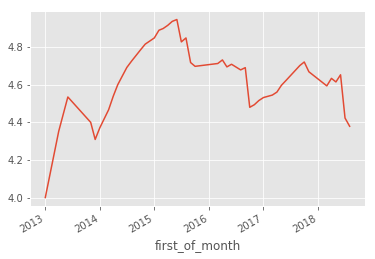

In [11]:
df_top_hops_grouped.moving_weighted_ratings.plot()

## fill in missing months

In [12]:
df_top_hops_grouped = pd.concat([df_top_hops[['first_of_month', 'rating']].groupby(['first_of_month']).mean(), \
                                 df_top_hops[['first_of_month', 'rating']].groupby(['first_of_month']).count()], \
                                axis=1)

df_top_hops_grouped.columns = ['rating_mean', 'rating_count']

In [13]:
def group_ratings_by_date(df, date_field, rating_field):
    
    df_grouped = pd.concat([df[[date_field, rating_field]].groupby([date_field]).mean(), \
                            df[[date_field, rating_field]].groupby([date_field]).count()], \
                           axis=1)
    
    df_grouped.columns = ['rating_mean', 'rating_count']
    
    return df_grouped


df_top_hops_grouped = group_ratings_by_date(df_top_hops, 'first_of_month', 'rating')
df_top_hops_grouped.head()

,rating_mean,rating_count
first_of_month,,
2013-01-01,4.0,2
2013-04-01,5.0,1
2013-06-01,5.0,1
2013-11-01,4.0,1
2013-12-01,4.0,1


In [14]:
def expand_dates(df, index=True, date_field=False):
    if index:
        return pd.Series(pd.date_range(df.index.min(), df.index.max().replace(month = df.index.max().month + 1), freq="M")).apply(first_of_month)
    else:
        return pd.Series(pd.date_range(df[date_field].min(), df[date_field].max().replace(month = df[date_field].max().month + 1), freq="M")).apply(first_of_month)
    

expanded_date_series = expand_dates(df_top_hops_grouped)
df_exp_dates = pd.DataFrame({'bar': len(expanded_date_series) * ['Top_Hops']}, index=expanded_date_series)
df_exp_dates.sort_index(ascending=False, inplace=True)
df_exp_dates.head()

,bar
2018-08-01,Top_Hops
2018-07-01,Top_Hops
2018-06-01,Top_Hops
2018-05-01,Top_Hops
2018-04-01,Top_Hops


In [15]:
df_top_hops_grouped = pd.concat([df_exp_dates, df_top_hops_grouped], axis=1).fillna(0)
df_top_hops_grouped.sort_index(ascending=False, inplace=True)
df_top_hops_grouped.head(10)

,bar,rating_mean,rating_count
2018-08-01,Top_Hops,4.000000,1.0
2018-07-01,Top_Hops,3.666667,3.0
2018-06-01,Top_Hops,5.000000,1.0
2018-05-01,Top_Hops,4.500000,2.0
2018-04-01,Top_Hops,5.000000,1.0
2018-03-01,Top_Hops,4.000000,1.0
2018-02-01,Top_Hops,0.000000,0.0
2018-01-01,Top_Hops,0.000000,0.0
2017-12-01,Top_Hops,0.000000,0.0
2017-11-01,Top_Hops,4.000000,1.0


In [16]:
def moving_weighted_ratings(df):

    ratings = []

    for row in range(df.shape[0]):

        m_weight = pd.Series((df.iloc[row:].index.max() - df.iloc[row:].index) / ( np.timedelta64(1, 'M') )).apply(month_weight) 
        m_rating = df.iloc[row:]['rating_mean'].values * df.iloc[row:]['rating_count'].values
        m_denom  = np.sum( m_weight * df.iloc[row:]['rating_count'].values )

        w_rating = np.round( (np.sum( m_weight * m_rating ) / m_denom), 3 )
        ratings.append( w_rating )

    return ratings

moving_weighted_ratings(df_top_hops_grouped)[:10]

[4.379, 4.423, 4.653, 4.615, 4.634, 4.594, 4.67, 4.671, 4.655, 4.669]

In [17]:
df_top_hops_grouped['moving_weighted_ratings'] = moving_weighted_ratings(df_top_hops_grouped)
df_top_hops_grouped.head(10)

,bar,rating_mean,rating_count,moving_weighted_ratings
2018-08-01,Top_Hops,4.000000,1.0,4.379
2018-07-01,Top_Hops,3.666667,3.0,4.423
2018-06-01,Top_Hops,5.000000,1.0,4.653
2018-05-01,Top_Hops,4.500000,2.0,4.615
2018-04-01,Top_Hops,5.000000,1.0,4.634
2018-03-01,Top_Hops,4.000000,1.0,4.594
2018-02-01,Top_Hops,0.000000,0.0,4.670
2018-01-01,Top_Hops,0.000000,0.0,4.671
2017-12-01,Top_Hops,0.000000,0.0,4.655
2017-11-01,Top_Hops,4.000000,1.0,4.669


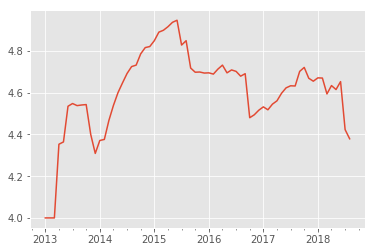

In [18]:
df_top_hops_grouped.moving_weighted_ratings.plot()

## let's run for all, merge and... 

In [19]:
all_date_series = expand_dates(df_ta_bar_reviews, False, 'first_of_month')

df_all_dates = pd.DataFrame({'p_holder': np.zeros(len(all_date_series))}, index=all_date_series)
df_all_dates.sort_index(ascending=False, inplace=True)
df_all_dates.head()

,p_holder
2019-06-01,0.0
2019-05-01,0.0
2019-04-01,0.0
2019-03-01,0.0
2019-02-01,0.0


In [20]:
df_bar_grouped = group_ratings_by_date(df_ta_bar_reviews[df_ta_bar_reviews.bar=='230_Fifth'], 'first_of_month', 'rating')

expanded_date_series = expand_dates(df_bar_grouped)
df_exp_dates = pd.DataFrame({'bar': len(expanded_date_series) * ['230_Fifth']}, index=expanded_date_series)

df_bar_grouped = pd.concat([df_exp_dates, df_bar_grouped], axis=1).fillna(0)
df_bar_grouped.sort_index(ascending=False, inplace=True)

df_bar_grouped['230_Fifth'] = moving_weighted_ratings(df_bar_grouped)
df_bar_grouped.head(10)

,bar,rating_mean,rating_count,230_Fifth
2019-06-01,230_Fifth,4.861789,123.0,4.457
2019-05-01,230_Fifth,4.675676,74.0,4.255
2019-04-01,230_Fifth,4.777778,54.0,4.087
2019-03-01,230_Fifth,3.181818,11.0,3.856
2019-02-01,230_Fifth,3.857143,14.0,3.905
2019-01-01,230_Fifth,3.384615,13.0,3.913
2018-12-01,230_Fifth,3.600000,15.0,3.956
2018-11-01,230_Fifth,4.500000,8.0,3.985
2018-10-01,230_Fifth,4.000000,15.0,3.954
2018-09-01,230_Fifth,3.933333,15.0,3.949


In [21]:
def bar_moving_weighted_ratings(df, bar_field, bar_name, date_field, rating_field):

    df_bar_grouped = group_ratings_by_date(df[df[bar_field] == bar_name], date_field, rating_field)

    expanded_date_series = expand_dates(df_bar_grouped)
    df_exp_dates = pd.DataFrame({'bar': len(expanded_date_series) * [bar_name]}, index=expanded_date_series)

    df_bar_grouped = pd.concat([df_exp_dates, df_bar_grouped], axis=1).fillna(0)
    df_bar_grouped.sort_index(ascending=False, inplace=True)

    df_bar_grouped[bar_name] = moving_weighted_ratings(df_bar_grouped)
    return df_bar_grouped
    
bar_moving_weighted_ratings(df_ta_bar_reviews, 'bar', '230_Fifth', 'first_of_month', 'rating').head(10)

,bar,rating_mean,rating_count,230_Fifth
2019-06-01,230_Fifth,4.861789,123.0,4.457
2019-05-01,230_Fifth,4.675676,74.0,4.255
2019-04-01,230_Fifth,4.777778,54.0,4.087
2019-03-01,230_Fifth,3.181818,11.0,3.856
2019-02-01,230_Fifth,3.857143,14.0,3.905
2019-01-01,230_Fifth,3.384615,13.0,3.913
2018-12-01,230_Fifth,3.600000,15.0,3.956
2018-11-01,230_Fifth,4.500000,8.0,3.985
2018-10-01,230_Fifth,4.000000,15.0,3.954
2018-09-01,230_Fifth,3.933333,15.0,3.949


In [22]:
for b in df_ta_bar_reviews.bar.unique():
    df_bar_moving_weighted_ratings = bar_moving_weighted_ratings(df_ta_bar_reviews, 'bar', b, 'first_of_month', 'rating')
    print(b, '\t', df_bar_moving_weighted_ratings[b][0])
    df_all_dates = pd.concat([df_all_dates, df_bar_moving_weighted_ratings[b]], axis=1).fillna(0)

230_Fifth 	 4.457
Beer_Authority 	 3.831
Beer_Culture 	 4.468
Blind_Tiger_Ale_House 	 4.471
Broome_Street_Bar 	 4.412
Buddha_Beer_Bar 	 2.632


C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Dalton_s_Bar_Grill 	 4.492
Earl_s_Beer_and_Cheese 	 3.801
Houston_Hall 	 4.298
Jeremy_s_Ale_House 	 4.313
Jimmy_s_Corner 	 4.362
Kiabacca_Bar 	 4.797
Loreley_Beer_Garden 	 3.747
Mercury_Bar 	 4.567
Mr_Biggs_Bar_Grill 	 3.802
New_York_Beer_Company 	 4.264
Old_Town_Bar 	 3.829
O_Reilly_s_Bar_Kitchen 	 4.457
Randolph_Beer 	 3.653
Rattle_and_Hum 	 4.142
Sean_s_Bar_And_Kitchen 	 4.416
Social_Bar 	 4.115
Taproom_307 	 4.195
The_Cannibal_Beer_Butcher 	 3.706
The_Ginger_Man 	 3.998
The_House_of_Brews 	 4.274
The_Jeffrey_Craft_Beer_Bar_and_Bites 	 4.634
The_Three_Monkeys 	 4.36
Top_Hops 	 4.379
Valhalla 	 4.4


In [23]:
df_all_dates.sort_index(ascending=False, inplace=True)
df_all_dates.head(20)

,p_holder,230_Fifth,Beer_Authority,Beer_Culture,Blind_Tiger_Ale_House,Broome_Street_Bar,Buddha_Beer_Bar,Dalton_s_Bar_Grill,Earl_s_Beer_and_Cheese,Houston_Hall,...,Sean_s_Bar_And_Kitchen,Social_Bar,Taproom_307,The_Cannibal_Beer_Butcher,The_Ginger_Man,The_House_of_Brews,The_Jeffrey_Craft_Beer_Bar_and_Bites,The_Three_Monkeys,Top_Hops,Valhalla
2019-06-01,0.0,4.457,3.831,4.468,4.471,0.000,2.632,4.492,0.000,0.000,...,4.416,0.000,0.000,0.000,3.998,4.274,4.634,4.360,0.000,0.000
2019-05-01,0.0,4.255,3.894,4.436,4.439,4.412,3.833,4.457,3.801,0.000,...,4.395,0.000,4.195,0.000,4.046,4.231,4.602,4.347,0.000,0.000
2019-04-01,0.0,4.087,3.877,4.443,4.433,4.403,3.846,4.375,4.311,0.000,...,4.375,4.115,4.200,0.000,4.149,4.238,4.614,4.336,0.000,4.400
2019-03-01,0.0,3.856,3.905,4.489,4.433,4.405,3.857,4.380,4.559,0.000,...,4.356,4.050,4.178,3.706,4.140,4.242,4.604,4.316,0.000,4.351
2019-02-01,0.0,3.905,3.886,4.553,4.519,4.406,3.632,4.380,4.678,0.000,...,4.355,3.982,4.312,3.694,4.140,4.272,4.554,4.319,0.000,4.351
2019-01-01,0.0,3.913,3.912,4.478,4.417,4.460,3.667,4.403,4.676,4.298,...,4.334,3.992,4.282,3.711,4.065,4.286,4.559,4.353,0.000,4.309
2018-12-01,0.0,3.956,3.964,4.401,4.300,4.456,3.750,4.340,4.658,4.220,...,4.350,3.993,4.268,3.663,3.997,4.290,4.566,4.340,0.000,4.326
2018-11-01,0.0,3.985,3.981,4.347,4.274,4.464,3.815,4.367,4.659,4.214,...,4.362,3.925,4.292,3.797,4.008,4.338,4.516,4.319,0.000,4.302
2018-10-01,0.0,3.954,3.990,4.355,4.298,4.403,3.906,4.368,4.640,4.221,...,4.371,3.926,4.101,3.814,4.097,4.316,4.511,4.262,0.000,4.306
2018-09-01,0.0,3.949,4.039,4.318,4.287,4.425,3.914,4.354,4.639,4.437,...,4.358,3.914,4.091,3.819,4.074,4.317,4.544,4.221,0.000,4.227


In [24]:
# df_all_dates.to_excel('ta_bar_reviews_weighted_moving_avg.xlsx')

## need to concat each bar on entire date range first and then work backwards in ratings, this will remove sudden zeroes in June

In [29]:
def bar_moving_weighted_ratings_macro_date_range(df, bar_field, bar_name, date_field, rating_field):

    df_bar_grouped = group_ratings_by_date(df[df[bar_field] == bar_name], date_field, rating_field)
    
    # change 1
    df_macro_dates_grouped = group_ratings_by_date(df, date_field, rating_field)

    # change 2
    expanded_date_series = expand_dates(df_macro_dates_grouped)
    df_exp_dates = pd.DataFrame({'bar': len(expanded_date_series) * [bar_name]}, index=expanded_date_series)

    df_bar_grouped = pd.concat([df_exp_dates, df_bar_grouped], axis=1).fillna(0)
    df_bar_grouped.sort_index(ascending=False, inplace=True)

    df_bar_grouped[bar_name] = moving_weighted_ratings(df_bar_grouped)
    return df_bar_grouped
    
bar_moving_weighted_ratings_macro_date_range(df_ta_bar_reviews, 'bar', 'Earl_s_Beer_and_Cheese', 'first_of_month', 'rating').head(10)

C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,bar,rating_mean,rating_count,Earl_s_Beer_and_Cheese
2019-06-01,Earl_s_Beer_and_Cheese,0.0,0.0,3.746
2019-05-01,Earl_s_Beer_and_Cheese,1.0,1.0,3.801
2019-04-01,Earl_s_Beer_and_Cheese,3.0,1.0,4.311
2019-03-01,Earl_s_Beer_and_Cheese,4.0,1.0,4.559
2019-02-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.678
2019-01-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.676
2018-12-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.658
2018-11-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.659
2018-10-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.640
2018-09-01,Earl_s_Beer_and_Cheese,0.0,0.0,4.639


In [31]:
all_date_series = expand_dates(df_ta_bar_reviews, False, 'first_of_month')

df_all_dates = pd.DataFrame({'p_holder': np.zeros(len(all_date_series))}, index=all_date_series)
df_all_dates.sort_index(ascending=False, inplace=True)
# df_all_dates.head()

for b in df_ta_bar_reviews.bar.unique():
    df_bar_moving_weighted_ratings = bar_moving_weighted_ratings_macro_date_range(df_ta_bar_reviews, 'bar', b, 'first_of_month', 'rating')
    print(b, '\t', df_bar_moving_weighted_ratings[b][0])
    df_all_dates = pd.concat([df_all_dates, df_bar_moving_weighted_ratings[b]], axis=1).fillna(0)

C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


230_Fifth 	 4.457
Beer_Authority 	 3.831
Beer_Culture 	 4.468
Blind_Tiger_Ale_House 	 4.471
Broome_Street_Bar 	 4.412
Buddha_Beer_Bar 	 2.632
Dalton_s_Bar_Grill 	 4.492
Earl_s_Beer_and_Cheese 	 3.746
Houston_Hall 	 4.281
Jeremy_s_Ale_House 	 4.313
Jimmy_s_Corner 	 4.352
Kiabacca_Bar 	 4.803
Loreley_Beer_Garden 	 3.753
Mercury_Bar 	 4.567
Mr_Biggs_Bar_Grill 	 3.824
New_York_Beer_Company 	 4.264
Old_Town_Bar 	 3.829
O_Reilly_s_Bar_Kitchen 	 4.449
Randolph_Beer 	 3.654
Rattle_and_Hum 	 4.174
Sean_s_Bar_And_Kitchen 	 4.416
Social_Bar 	 4.131
Taproom_307 	 4.185
The_Cannibal_Beer_Butcher 	 3.673
The_Ginger_Man 	 3.998
The_House_of_Brews 	 4.274
The_Jeffrey_Craft_Beer_Bar_and_Bites 	 4.634
The_Three_Monkeys 	 4.36
Top_Hops 	 4.256
Valhalla 	 4.412


In [32]:
df_all_dates.sort_index(ascending=False, inplace=True)
df_all_dates.head()

,p_holder,230_Fifth,Beer_Authority,Beer_Culture,Blind_Tiger_Ale_House,Broome_Street_Bar,Buddha_Beer_Bar,Dalton_s_Bar_Grill,Earl_s_Beer_and_Cheese,Houston_Hall,...,Sean_s_Bar_And_Kitchen,Social_Bar,Taproom_307,The_Cannibal_Beer_Butcher,The_Ginger_Man,The_House_of_Brews,The_Jeffrey_Craft_Beer_Bar_and_Bites,The_Three_Monkeys,Top_Hops,Valhalla
2019-06-01,0.0,4.457,3.831,4.468,4.471,4.412,2.632,4.492,3.746,4.281,...,4.416,4.131,4.185,3.673,3.998,4.274,4.634,4.360,4.256,4.412
2019-05-01,0.0,4.255,3.894,4.436,4.439,4.412,3.833,4.457,3.801,4.283,...,4.395,4.118,4.195,3.689,4.046,4.231,4.602,4.347,4.262,4.405
2019-04-01,0.0,4.087,3.877,4.443,4.433,4.403,3.846,4.375,4.311,4.294,...,4.375,4.115,4.200,3.703,4.149,4.238,4.614,4.336,4.292,4.400
2019-03-01,0.0,3.856,3.905,4.489,4.433,4.405,3.857,4.380,4.559,4.293,...,4.356,4.050,4.178,3.706,4.140,4.242,4.604,4.316,4.301,4.351
2019-02-01,0.0,3.905,3.886,4.553,4.519,4.406,3.632,4.380,4.678,4.293,...,4.355,3.982,4.312,3.694,4.140,4.272,4.554,4.319,4.301,4.351


In [33]:
# df_all_dates.to_excel('ta_bar_reviews_weighted_moving_avg_macro_date_range.xlsx')

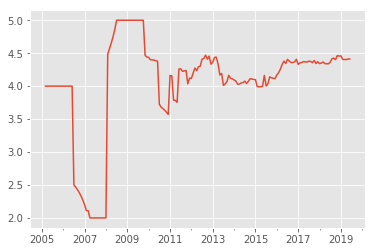

In [35]:
df_all_dates.Broome_Street_Bar.plot()

## some bars go for several months w/o reviews, perhaps suspend rating after n-months